# Linear Regression Assignment

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

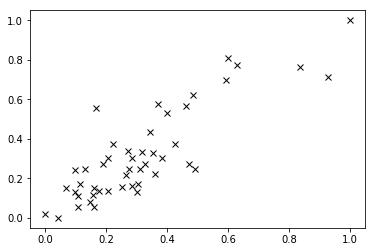

In [7]:
data = pd.read_csv("ex1data2.txt")
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled,columns=["c1","c2","c3"])

X_df = pd.DataFrame(data.c1)
y_df = pd.DataFrame(data.c3)
m = len(y_df)

plt.figure(figsize=(6,4))
plt.plot(X_df, y_df, 'kx')

In [8]:
# pd.DataFrame(data.iloc[:,0:2]).plot(kind='area')
# data[["c1","c2"]])

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

# cost_function(X, y, theta)

def gradient_descent(X, y, theta, alpha, iterations):
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)

        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

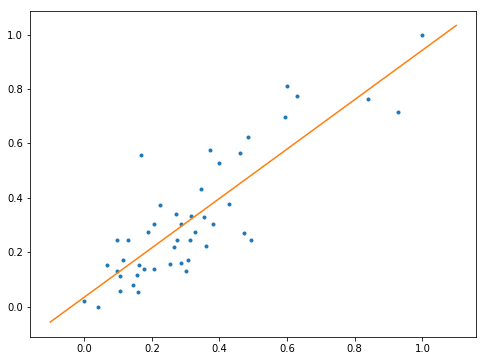

In [10]:
itera = 10000
alpha = 0.01
X_df['intercept'] = 1

X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

t,gd = gradient_descent(X,y,theta,alpha, itera)

best_fit_x = np.linspace(-0.1, 1.1, 30)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

plt.figure(figsize=(8,6))
plt.plot(X_df.c1, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.show()